# Neuron networks from scratch in Python
References: http://103.203.175.90:81/fdScript/RootOfEBooks/E%20Book%20collection%20-%202024%20-%20G/CSE%20%20IT%20AIDS%20ML/Neural%20Network.pdf

In [210]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

## Chapter 10: Optimizers

### 10.1 Stochastic Gradient Descent

In [211]:
class Optimizer_SGD:
    def __init__(self, learning_rate, decay=0):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
    
    def update_params(self, layer):
        layer.weights -= self.current_learning_rate * layer.dweights
        layer.biases -= self.current_learning_rate * layer.dbiases
    
    def post_update_params(self):
        self.iterations += 1

### 10.2 Stochastic Gradient Descent with momentum

In [212]:
class Optimizer_SGD:
    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay 
        self.momentum = momentum
        self.iterations = 0


    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1. + self.decay * self.iterations)
    
    def update_params(self, layer):
        if self.momentum:
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(self.weights)
                layer.biases_momentums = np.zeros_like(self.biases)

            layer.weight_momentums = self.momentum * layer.weight_momentums - self.current_learning_rate * self.dweights
            layer.bias_momentums = self.momentum * layer.bias_momentums - self.current_learning_rate * self.dbiases
        
        else:
            layer.weights -= self.current_learning_rate * layer.dweights
            layer.biases -= self.current_learning_rate * layer.biases
        
    def post_update_params(self):
        self.iterations += 1

### 10.3 Adagrad

In [213]:
class Optimizer_Adagrad:
    def __init__(self, learning_rate=1., decay=0., epsilon=1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.epsilon = epsilon
        self.iterations = 0
    
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1. + self.decay * self.iterations)
    
    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        layer.weight_cache += layer.dweights ** 2
        layer.bias_cache += layer.dbiases ** 2

        layer.weights -= self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases -= self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)
    
    def post_update_params(self):
        self.iterations += 1

### 10.4 RMSProp

In [214]:
class Optimizer_RMSProp:
    def __init__(self, learning_rate=1., decay=0., epsilon=1e-7, rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.epsilon = epsilon
        self.rho = rho
        self.iterations = 0
    
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1 + self.decay * self.iterations)
    
    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        layer.weight_cache = self.rho * layer.weight_cache - (1 - self.rho) * layer.dweights ** 2
        layer.bias_cache = self.rho * layer.bias_cache - (1 - self.rho) * layer.dbiases ** 2

        layer.weights -= self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases -= self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)
    
    def post_update_params(self):
        self.iterations += 1

### 10.5 Adam

In [215]:
class Adam:
    def __init__(self, learning_rate=1., decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.iterations = 1
    
    def pre_update_params(self):
        self.current_learning_rate = self.learning_rate / (1. + self.decay * self.iterations)
    
    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1. - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1. - self.beta_1) * layer.dbiases
        
        layer.weight_momentums_corrected = layer.weight_momentums / (1. - self.beta_1 ** self.iterations)
        layer.bias_momentums_corrected = layer.bias_momentums / (1. - self.beta_1 ** self.iterations)

        layer.weight_cache = self.beta_2 * layer.weight_cache + (1. - self.beta_2) * layer.dweights ** 2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1. - self.beta_2) * layer.dbiases ** 2

        layer.weight_cache_corrected = layer.weight_cache / (1. - self.beta_2 ** self.iterations)
        layer.bias_cache_corrected = layer.bias_cache / (1. - self.beta_2 ** self.iterations)

        layer.weights -= self.current_learning_rate * layer.weight_momentums_corrected / \
                                                (np.sqrt(layer.weight_cache_corrected) + self.epsilon)
        layer.biases -= self.current_learning_rate * layer.bias_momentums_corrected / \
                                                (np.sqrt(layer.bias_cache_corrected) + self.epsilon)
    
    def post_update_params(self):
        self.iterations += 1

### Implement

In [216]:
class Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
    
    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)

class ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

class Softmax:
    def forward(self, inputs):
        self.inputs = inputs

        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    
    def backward(self, dvalues):
        samples = len(dvalues)
        classes = len(dvalues[0])

        for i, (single_output, single_dvalue) in enumerate(zip(self.output, dvalues)):
            single_output = np.reshape(single_output, (-1, 1))

            jacobian = np.diagflat(single_output) - np.dot(single_output, single_output.T)

            self.dinputs[i] = np.dot(jacobian, single_dvalue)

class Loss:
    def calculate(self, y_pred, y_true):

        return np.mean(self.forward(y_pred, y_true))
    
class CategoricalCrossEntropy(Loss):
    def forward(self, y_pred, y_true):

        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(len(y_pred)), y_true]
        
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

        return - np.log(correct_confidences)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        classes = len(dvalues[0])

        if len(y_true.shape) == 1:
            y_true = np.eye(samples)[y_true]
        
        self.dinputs = - y_true / dvalues / samples

class Softmax_CategoricalCrossEntropy:
    def __init__(self):
        self.activation = Softmax()
        self.loss = CategoricalCrossEntropy()

    def forward(self, inputs, y_true):
        self.activation.forward(inputs)

        self.output = self.activation.output

        return self.loss.calculate(self.output, y_true)
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)

        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        
        self.dinputs = dvalues.copy()

        self.dinputs[range(samples), y_true] -= 1
        self.dinputs /= samples

class Adam:
    def __init__(self, learning_rate=1., decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.iterations = 1
    
    def pre_update_params(self):
        self.current_learning_rate = self.learning_rate / (1. + self.decay * self.iterations)
    
    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1. - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1. - self.beta_1) * layer.dbiases
        
        layer.weight_momentums_corrected = layer.weight_momentums / (1. - self.beta_1 ** self.iterations)
        layer.bias_momentums_corrected = layer.bias_momentums / (1. - self.beta_1 ** self.iterations)

        layer.weight_cache = self.beta_2 * layer.weight_cache + (1. - self.beta_2) * layer.dweights ** 2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1. - self.beta_2) * layer.dbiases ** 2

        layer.weight_cache_corrected = layer.weight_cache / (1. - self.beta_2 ** self.iterations)
        layer.bias_cache_corrected = layer.bias_cache / (1. - self.beta_2 ** self.iterations)

        layer.weights -= self.current_learning_rate * layer.weight_momentums_corrected / \
                                                (np.sqrt(layer.weight_cache_corrected) + self.epsilon)
        layer.biases -= self.current_learning_rate * layer.bias_momentums_corrected / \
                                                (np.sqrt(layer.bias_cache_corrected) + self.epsilon)
    
    def post_update_params(self):
        self.iterations += 1

In [ ]:
X, y = spiral_data(samples=100, classes=3)

dense1 = Dense(2, 64)
activation1 = ReLU()
dense2 = Dense(64, 3)
loss_activation = Softmax_CategoricalCrossEntropy()

optimizer = Adam(learning_rate=0.05, decay=5e-7)

for epoch in range(10000):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    predictions = np.argmax(loss_activation.output, axis=1)

    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 100:
        print(f'Epoch: {epoch}, Acc: {accuracy}, Loss: {loss:.3f}, Lr: {optimizer.current_learning_rate}')

    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

Epoch: 0, Acc: 0.36, Loss: 1.099, Lr: 0.05
Epoch: 100, Acc: 0.6933333333333334, Loss: 0.690, Lr: 0.049997500124993745
Epoch: 200, Acc: 0.7966666666666666, Loss: 0.551, Lr: 0.04999500049995001
Epoch: 300, Acc: 0.82, Loss: 0.475, Lr: 0.04999250112483127
Epoch: 400, Acc: 0.8333333333333334, Loss: 0.433, Lr: 0.04999000199960008
Epoch: 500, Acc: 0.8566666666666667, Loss: 0.388, Lr: 0.04998750312421894
Epoch: 600, Acc: 0.8633333333333333, Loss: 0.368, Lr: 0.04998500449865041
Epoch: 700, Acc: 0.8866666666666667, Loss: 0.339, Lr: 0.049982506122857
Epoch: 800, Acc: 0.8833333333333333, Loss: 0.326, Lr: 0.04998000799680129
Epoch: 900, Acc: 0.8866666666666667, Loss: 0.328, Lr: 0.0499775101204458
Epoch: 1000, Acc: 0.8933333333333333, Loss: 0.310, Lr: 0.04997501249375313
Epoch: 1100, Acc: 0.9066666666666666, Loss: 0.293, Lr: 0.04997251511668582
Epoch: 1200, Acc: 0.9033333333333333, Loss: 0.285, Lr: 0.04997001798920648
Epoch: 1300, Acc: 0.8766666666666667, Loss: 0.286, Lr: 0.04996752111127767
Epoch: 

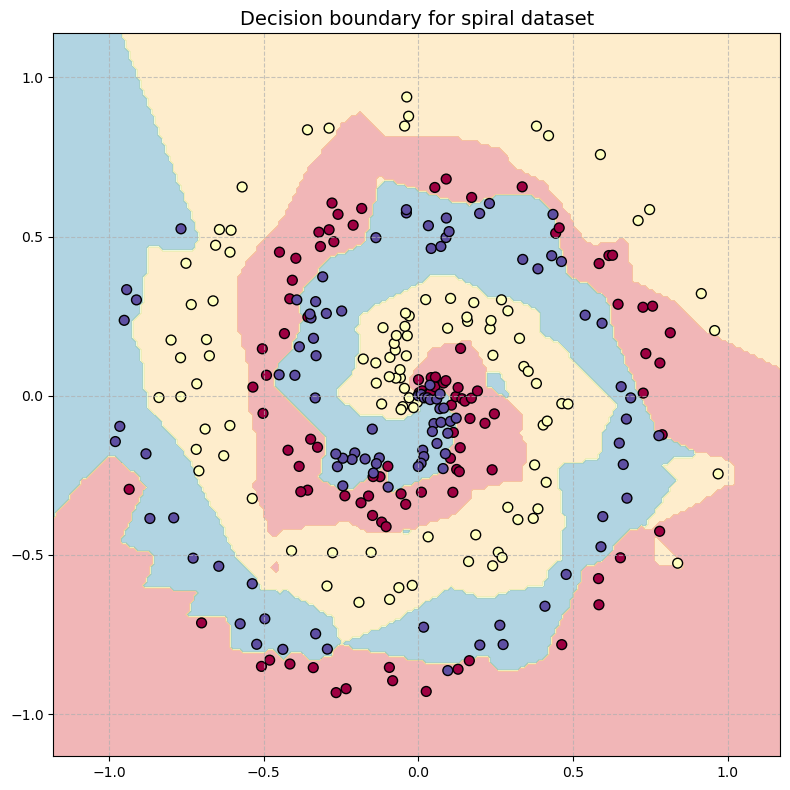

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def spiral_data(samples, classes):
    X = np.zeros((samples * classes, 2))
    y = np.zeros(samples * classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(samples * class_number, samples * (class_number + 1))
        r = np.linspace(0.0, 1, samples)
        t = np.linspace(class_number * 4, (class_number + 1) * 4, samples) + np.random.randn(samples) * 0.2
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = class_number
    return X, y

try:
    X, y = X, y 
except NameError:
    X, y = spiral_data(samples=100, classes=3)

if len(y.shape) == 2:
    y = np.argmax(y, axis=1)

x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

dense1.forward(grid)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss_activation.activation.forward(dense2.output)  
grid_predictions = np.argmax(loss_activation.activation.output, axis=1)

grid_predictions = grid_predictions.reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.Spectral, alpha=0.4, levels=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k', s=50)
plt.title('Decision boundary for spiral dataset', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()